# K-NN from Scratch in Numpy

The K-Nearest Neighbor algorithm is a pretty simple algorithm that can be used for both `regression` and `classification` tasks. Assumption that this algorithm makes is that simlar points have similar labels , i.e points 'close by' , based on some measure of distance, have similar labels.


Algorithm works as follows - 

Given $x \in T$ where $T$ is the test set.

1. Find the closest $K$ points to $x$ using some distance function $f(x,z) \forall z \in Train$. Let these points form a set $K \subset Train$ 
2. Use  $y$ values of these K closest points and average them
  $$ \frac{1}{K} \Sigma{y} \ $$ such that $  (x,y) \in K$

3. Return the `mean` value as our prediction for the test point

## Implementation

Let's get started with our implementation and load in the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

Let's first generate some data. Here we will solve a regression problem.


We assume that there is a process $y= 20*x + \epsilon $
, where $ \epsilon $  is some small random noise.

We then generate $N$ samples with $d$ dimensions. We assume that the data is $  X \sim \mathcal{N}(10,\,5)\,. $

In [2]:
N = 1000
d = 2
x = np.random.normal(10,5,(N,d))
y = np.sum(20*x + np.random.normal(0,0.6,(N,d)) , 1)
train_idx = np.random.choice(np.arange(0,N) , 600)
test_idx = np.array([i for i in np.arange(0,N) if i not in train_idx])

Let's visualize the data we have.

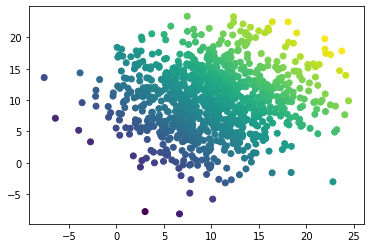

In [3]:
plt.scatter(x[:, 0] , x[: , 1] , c=y)

### k-NN class

Now we implement our KNN class. This is fairly straightforward.

The class takes as input $k$ - which is the number of closest points to consider for our predictions.

While `fitting` the data, we simply save the observations. This is because KNN is an on-line algorithm.

When `predicting` , we take the test point $ X $ and pass it the  predict method. This is where our `k-NN` logic resides.


In [4]:
class KNN:

  def __init__(self , k=5):
    self.k = k
    self.X = None
    self.y = None

  def fit(self,X,y):
    self.X = X
    self.y = y
  
  def _closest(self,x):
    sorted_dists = np.argsort(np.sum((x - self.X)**2 , 1))
    closest_points = sorted_dists[:self.k]
    closest_ys = self.y[closest_points]
    return np.mean(closest_ys)

  def predict(self,x):
    return np.apply_along_axis(self._closest , 1,x)

### Testing our implementation

We instantiate an instance and pass our training data to the `fit` method.

In [5]:
knn = KNN()
knn.fit(x[train_idx],y[train_idx])

Now we make predictions using the `predict` method

In [6]:
y_hat = knn.predict(x[test_idx])

Now let's evaluate the results using `Squared Error` and compare it to `mean` prediction algorithm (one that returns $ \bar{y} $ as a constant prediction irrespective of the $X$ value)

In [7]:
np.mean((y_hat-y[test_idx])**2)

244.38300413183532

We get a `MSE` of 16 for our KNN algorithm. Now lets check the `Mean Predictor`

In [8]:
np.mean((y[test_idx] - np.mean(y[train_idx]))**2)

23184.435230435232

We get a much worse performance of 15917 for this. Therefore we see that Knn works much better.

### Experimentation

Now let's experiment with different values of $N$ , $d$ and $k$.

Theoretically
1. As $N$ (sample size) increases , our test-error should decrease
2. As $d$ (number of dimensions) increases, our test-error should increase because of curse of dimensionality
3. As $k$ (number of nearest neighbors) increases , our test-error should increase because of higher `regularization` and increase in `bias` towards a simpler $ h \in H$. $H$ being the set of all possible k-nn algorithms with different k-values

In [9]:
class Experiment:

  def __init__(self , N=1000 , d=2):
    self.N = N
    self.d = d
    self.x = np.random.normal(10,5,(N,d))
    self.y = np.sum(20*self.x + np.random.normal(0,0.6,(N,d)) , 1)
    tn = int(N*0.75)
    self.train_idx = np.random.choice(np.arange(0,N) , tn)
    self.test_idx = np.array([i for i in np.arange(0,N) if i not in self.train_idx])

  
  def test(self):
    knn = KNN()
    knn.fit(self.x[self.train_idx],self.y[self.train_idx])
    y_hat = knn.predict(self.x[self.test_idx])
    kperf = np.mean((y_hat-self.y[self.test_idx])**2)
    mperf = np.mean((self.y[self.test_idx] - np.mean(self.y[self.train_idx]))**2)
    return kperf,mperf

Lets try a few values of $N$ and $d$ that we are interested in.

In [10]:
ns = [100,200,300,500,1000,10000]
ds = 10**np.arange(0,5,1)

### Effect of Sample Size

As discussed above, with increase in sample size $lim_{N \to inf}$ , the K-NN algorithm should tend to the `Optimal Bayes` algorithm and should have the best possible performance. Lets run the experiment for a bunch of different $N \in $ {100 , 200,300,500,1000,10000} 

In [11]:
d = 2
kperf , mperf = [] , []
for n in ns:
    ki,mi = Experiment(n,d).test()
    print(ki,mi)
    kperf.append(ki)
    mperf.append(mi)

1231.6843605079791 17155.971168343884
580.0603062869661 19393.544774837494
1026.8757966751953 20232.14669898377
344.93182882713734 15051.91336600568
249.04813797502914 19769.103999980867
22.732336013811754 19445.620962512163


Text(0.5, 1.0, 'Test Error for KNN')

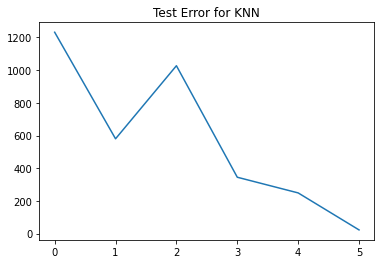

In [12]:
plt.plot(np.arange(0,len(ns)) , kperf)
plt.title("Test Error for KNN")

We can see that as $N$ increases the overall `Test Error` goes down significantly. 

Text(0.5, 1.0, 'Test Error for Mean Predictor')

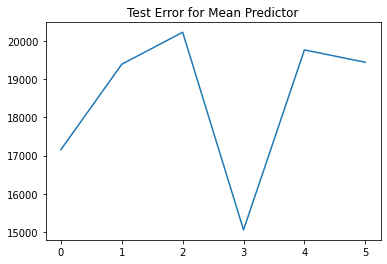

In [13]:
plt.plot(np.arange(0,len(ns)) , mperf)
plt.title("Test Error for Mean Predictor")

We see that performance for the `Mean predictor` does not change much with the sample size.

In [14]:
n = 5000
kperf , mperf = [] , []
for d in ds:
    ki,mi = Experiment(n,d).test()
    #print(ki,mi)
    kperf.append(ki)
    mperf.append(mi)

Text(0.5, 1.0, 'Test Error for KNN')

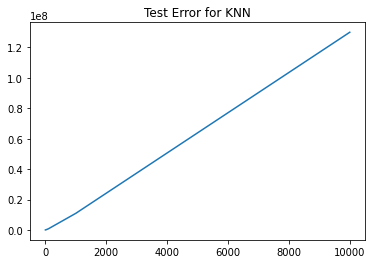

In [15]:
plt.plot(ds , kperf)
plt.title("Test Error for KNN")

We can see that as the number of dimensions increases, test error for KNN increases almost linearly.

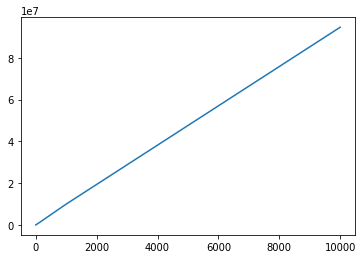

In [16]:
plt.plot(ds , mperf)

We can see that as the number of dimensions increases, test error for Mean Predictor increases almost linearly.

### Curse of Dimensionality

Let's run some experiments to observe curse of dimensionality.
Our `Hypotheses` is that as the number of dimensions increases , everything moves further away from each other, this is because when the dimensionality is too high then there are so many possible features and points become more and more dissimilar.

Therefore `the spread` of distance between any two points should be lower where there are fewer dimensions and higher when there are more dimensions.

Let's check for $d \in $ {2, 10, 100 ,1000 , 10000}

In [17]:
class Curse(Experiment):

  def get_distances(self):
    return np.ravel(np.apply_along_axis(lambda v :  np.sum((v - self.x)**2 , 1) , 1 , self.x))

In [18]:
import pandas as pd

In [19]:
dfs = []
for d in [2,10,100,1000, 10000]:
  dists = Curse(d=d).get_distances()
  df = pd.DataFrame({"dist" : dists})
  df["d"] = d
  dfs.append(df)

In [20]:
alldfs = pd.concat(dfs)

In [21]:
alldfs.shape

(5000000, 2)

In [31]:
sample_dists = alldfs.groupby('d', group_keys=False).apply(lambda x: x.sample(min(len(x), 50000)))

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 330'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


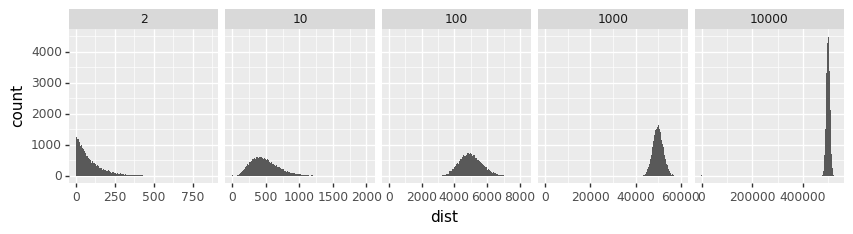

<ggplot: (-9223363282509655278)>

In [39]:
(
    ggplot(sample_dists , aes(x="dist")) 
    + geom_histogram()
    + facet_wrap("~ d" ,scales="free_x" ,ncol=5)
    + theme(figure_size=(10,2))
)

## Important takeaways

1. We can see (notice the x-axis in above chart) that as the number of dimensions increases `mean distance` between the data points also increases almost by the same factor.

2. Also another important thing to note here is that the spread of distances decreases as the number of dimensions increases (it gets pointier) , which means that almost all points have similar distances with all other points. 

This has an important consequence for `KNN` because it's primary assumption is that similar points have similar labels. Now if everything is 'same' , the algorithm can't really work well to pick `k` points.